# Logistic Regression for df_merged_zero_15x15_final

# Table of Contents<a class="anchor" id="Contents"></a>
* [Load Packages](#Packages)
* [Load Dataset](#Dataset)
    * [Train Test Validation Split](#Train_Test_Validation_Split)
* [Functions](#Functions)
* [Logistic Regression](#LG)
    * [Run the Model](#Run_LG)
    * [ROC Curve and Precision-Recall Curve](#Curve_LG)
    * [Results](#Results_LG)
* [Logistic Regression with PCA](#PCA)
* [Test for different ....](#Regions)

# Load Packages<a class="anchor" id="Packages"></a>

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.metrics import RocCurveDisplay, auc, roc_auc_score, make_scorer, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import silhouette_score
from keras.optimizers import Adam
import random
import csv
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.utils.class_weight import compute_class_weight
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [88]:
from joblib import load

best_lg = load('best_model/best_lg_zero.joblib')
#best_lg_pc = load('best_model/best_lg_mean_pc.joblib')

* [Table of Contents](#Contents)

# Load Dataset<a class="anchor" id="Dataset"></a>

In [89]:
df_merged_mean_15x15 = pd.read_csv('data/df_merged_zero_15x15_final.csv')
df_merged_mean_15x15

,site,time,riskLevelLabel,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,...,SPM_15x15_q1,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3
0,ukc1101-06000,2020-05-14,0,0.014399,0.648437,9.016005,0.720255,1.359252,26.936116,0.014399,...,5.846387,0.720255,1.359252,26.936116,0.014399,0.648437,5.846387,0.720255,1.359252,26.936116
1,ukc1101-06000,2020-05-15,0,0.000000,0.000000,8.102808,0.393628,1.778462,10.588528,0.000000,...,8.102808,0.393628,1.778462,10.588528,0.000000,0.000000,8.102808,0.393628,1.778462,10.588528
2,ukc1101-06000,2020-05-16,0,0.000000,0.000000,1.135922,0.263305,2.588783,5.632908,0.000000,...,1.135922,0.263305,2.588783,5.632908,0.000000,0.000000,1.135922,0.263305,2.588783,5.632908
3,ukc1101-06000,2020-05-17,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ukc1101-06000,2020-05-18,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187106,ukk4307-33900,2022-09-26,0,0.000000,0.000000,7.356489,0.183889,3.869243,3.158081,0.000000,...,7.356489,0.183889,3.869243,3.158081,0.000000,0.000000,7.356489,0.183889,3.869243,3.158081
187107,ukk4307-33900,2022-09-27,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
187108,ukk4307-33900,2022-09-28,0,0.000000,0.000000,4.906127,0.142344,5.219365,2.063839,0.000000,...,4.906127,0.142344,5.219365,2.063839,0.000000,0.000000,4.906127,0.142344,5.219365,2.063839
187109,ukk4307-33900,2022-09-29,0,0.000000,0.000000,9.181858,0.151466,4.857575,2.291730,0.000000,...,9.181858,0.151466,4.857575,2.291730,0.000000,0.000000,9.181858,0.151466,4.857575,2.291730


## Train Test Validation Split<a class="anchor" id="Train_Test_Validation_Split"></a>

In [80]:
train_labels_mean_zero = pd.read_csv('data/train_labels_mean_zero.csv')[['time', 'site']]
train_labels_mean_zero

,time,site
0,2021-05-25,ukk4305-25800
1,2022-07-04,ukk4305-25800
2,2022-08-08,ukk3105-31450
3,2022-08-27,ukk2206-20800
4,2020-06-08,uke1301-09020
...,...,...
112261,2021-07-19,ukj4210-12660
112262,2021-05-10,ukk4200-23200
112263,2020-08-10,ukk3104-33500
112264,2021-09-08,ukk1202-35700


In [81]:
validation_labels_mean_zero = pd.read_csv('data/validation_labels_mean_zero.csv')[['time', 'site']]
validation_labels_mean_zero

,time,site
0,2020-07-02,ukj3400-17400
1,2022-08-27,ukk3106-32200
2,2021-05-06,ukk4307-33900
3,2021-05-20,ukk4304-34100
4,2021-06-04,ukk3104-33200
...,...,...
37417,2021-07-28,ukk3103-29800
37418,2021-05-02,uke2206-07200
37419,2022-09-08,ukk4301-21800
37420,2021-07-18,ukj2403-15900


In [82]:
test_labels_mean_zero = pd.read_csv('data/test_labels_mean_zero.csv')[['time', 'site']]
test_labels_mean_zero

,time,site
0,2022-09-21,ukk3106-32100
1,2020-08-08,ukh1407-10750
2,2020-09-20,ukd4200-42100
3,2022-07-06,ukk2206-20900
4,2021-08-24,ukk4305-26100
...,...,...
37418,2021-09-22,ukj2402-15680
37419,2021-08-14,ukk3104-33500
37420,2022-05-20,ukk4305-25600
37421,2022-06-25,ukj3400-18000


In [83]:
# Train test validation split
df_train = df_merged_mean_15x15.merge(train_labels_mean_zero, on=['time', 'site'], how='inner')
df_val = df_merged_mean_15x15.merge(validation_labels_mean_zero, on=['time', 'site'], how='inner')
df_test = df_merged_mean_15x15.merge(test_labels_mean_zero, on=['time', 'site'], how='inner')

df_train.drop(['time', 'site'], axis=1, inplace=True)
df_val.drop(['time', 'site'], axis=1, inplace=True)
df_test.drop(['time', 'site'], axis=1, inplace=True)

y_train = df_train.pop('riskLevelLabel')
y_val = df_val.pop('riskLevelLabel')
y_test = df_test.pop('riskLevelLabel')

X_train = df_train
X_val = df_val
X_test = df_test

print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Validation X Shape:', X_val.shape)
print('Validation y Shape:', y_val.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (112266, 192)
Training y Shape: (112266,)
Validation X Shape: (37422, 192)
Validation y Shape: (37422,)
Testing X Shape: (37423, 192)
Testing y Shape: (37423,)


In [52]:
# Scale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [11]:
counts_normalized = y_train.value_counts(normalize=True)
counts_normalized

0    0.972619
1    0.027381
Name: riskLevelLabel, dtype: float64

* [Table of Contents](#Contents)

# Functions<a class="anchor" id="Functions"></a>

In [21]:
def plot_roc_pr_graphs(model, X_test, y_test):
    # predictions from best model on validation data
    predictions = model.predict(X_test)

    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)

    # PR curve and AP
    precision, recall, thresholds = precision_recall_curve(y_test, predictions)
    average_precision = average_precision_score(y_test, predictions)

    # plots
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, marker='.',label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
    plt.grid(True)
    plt.legend(loc="lower right", fontsize=15)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, marker='.', label='PR curve (AP = %0.4f)' % average_precision)
    plt.axhline(y=counts_normalized[1], color="gray", linestyle='--', label='Baseline')
    plt.xlabel('Recall', fontsize=15)
    plt.ylabel('Precision', fontsize=15)
    plt.title('Precision-Recall (PR) Curve', fontsize=15)
    plt.grid(True)
    plt.legend(loc="upper right", fontsize=15)

    plt.tight_layout()
    plt.savefig('results/LG_S3_zero_Curves.png')
    plt.show()

In [22]:
def cm(model,X_test,y_test):
    cm = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    cm.plot
    plt.savefig('results/LG_S3_zero_CM.png')

In [9]:
def save_result(model,X_test,y_test):
    y_pred = model.predict(X_test)
    ACC = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    AUC_ROC = auc(fpr, tpr)
    PRE = precision_score(y_test, y_pred)
    REC = recall_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    AP = average_precision_score(y_test, y_pred)
    #AUC_PRC = auc(recall, precision)
    F1 = f1_score(y_test, y_pred)
    return ACC, AUC_ROC, PRE, REC, AP, F1

In [10]:
def get_metrics_from_test_df(df):
    y_pred = df['predictions']
    y_actual = df['riskLevelLabel']

    f1_ = round(f1_score(y_actual, y_pred), 3)
    precision = round(precision_score(y_actual, y_pred), 3)
    recall = round(recall_score(y_actual, y_pred), 3)
    pr_auc = round(average_precision_score(y_actual, y_pred), 3)
    roc_auc = round(roc_auc_score(y_actual, y_pred), 3)   
    accuracy = round(accuracy_score(y_actual, y_pred), 3)
    
    metrics_list = [len(df), f1_, precision, recall, pr_auc, roc_auc, accuracy]
    return metrics_list

* [Table of Contents](#Contents)

# Logistic Regression<a class="anchor" id="LG"></a>

In [33]:
def lg_model(X_train, y_train, X_val, y_val):
    params = {'penalty': ['elasticnet'], # regularization types
              'C': [0.001, 0.01, 0.1, 1], # λ
              'l1_ratio': [0, 0.25, 0.5, 0.75, 1]  # only relevant for 'elasticnet'
             }
    best_f1 = 0
    best_params = {}
    for penalty in params['penalty']:
        for C in params['C']:
            for l1_ratio in params['l1_ratio']:
                lg = LogisticRegression(C=C, penalty=penalty, l1_ratio=l1_ratio, 
                                       random_state = 100, #specify the random_state
                                       solver = 'saga', class_weight = 'balanced',
                                       n_jobs = -1, #use all cpu cores
                                       max_iter = 5000 #give more iteration for model to converge
                                       )
                temp_model = lg.fit(X_train, y_train)
                y_val_pred = lg.predict(X_val)
                f1 = f1_score(y_val, y_val_pred)
                if f1 > best_f1:
                    best_f1 = f1
                    best_params = {'penalty': penalty, 'C': C, 'l1_ratio': l1_ratio}
                    best_lg = temp_model
        
    print('Best Hyperparameters:', best_params)
    return best_lg

## Run the Model<a class="anchor" id="Run_LG"></a>

### Select the best hyperparameter on validation data

In [1]:
best_lg = lg_model(X_train, y_train, X_val, y_val)

Best Hyperparameters: {'penalty': 'elasticnet', 'C': 0.01, 'l1_ratio': 0.25}


In [ ]:
def Best_lg(X_train, y_train):
    lg = LogisticRegression(C=0.01, penalty='elasticnet', l1_ratio=0.25, 
                           random_state = 100,
                           solver = 'saga', class_weight = 'balanced',
                           n_jobs = -1, max_iter = 5000 #give more iteration for model to converge
                            )
    lg.fit(X_train, y_train)
    return lg

## ROC Curve and Precision-Recall Curve<a class="anchor" id="Curve_LG"></a>

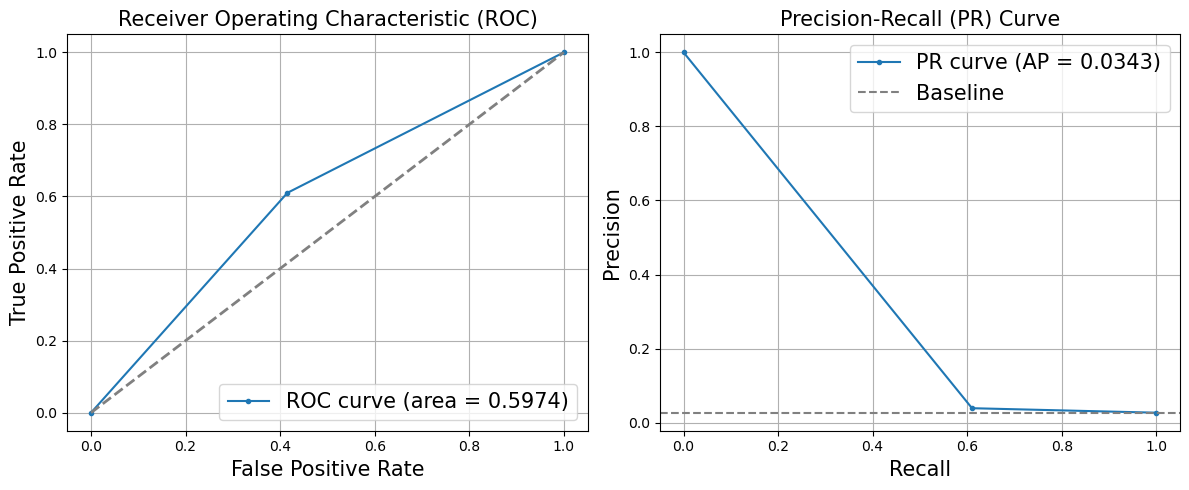

In [26]:
plot_roc_pr_graphs(best_lg, X_test, y_test)

## Results<a class="anchor" id="Results_LG"></a>

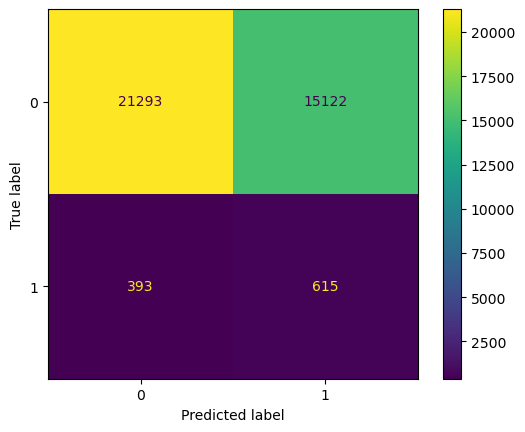

In [27]:
cm(best_lg, X_test, y_test)

In [28]:
results_df_lg = pd.DataFrame([['Logistic Regression', 'df_merged_zero_15x15', *save_result(best_lg,X_test,y_test)]],
                             columns=['Model', 'Sub-Model', 'Accuracy', 'AUC_ROC','Precision','Recall', 'AP', 'f1 score'])
results_df_lg

,Model,Sub-Model,Accuracy,AUC_ROC,Precision,Recall,AP,f1 score
0,Logistic Regression,df_merged_zero_15x15,0.585415,0.597425,0.03908,0.610119,0.034345,0.073455


In [29]:
results_df_lg.to_csv('results/LG_results_zero.csv')

* [Table of Contents](#Contents)

# Logistic Regression with PCA<a class="anchor" id="PCA"></a>

In [30]:
## Fit X_train, X_val, X_test with the PCA
pca = PCA(n_components = 5, random_state = 100)
pca.fit(X_train)
X_train_pc = pca.transform(X_train)
X_val_pc = pca.transform(X_val)
X_test_pc = pca.transform(X_test)

In [34]:
%%time
best_lg_pc = lg_model(X_train_pc, y_train, X_val_pc, y_val)

Best Hyperparameters: {'penalty': 'elasticnet', 'C': 0.01, 'l1_ratio': 0.75}
Wall time: 1min 12s


In [35]:
results_lg_pca = pd.DataFrame([['Logistic Regression', 'df_merged_zero_15x15 with PCA', *save_result(best_lg_pc,X_test_pc,y_test)]],
                             columns=['Model', 'Sub-Model', 'Accuracy', 'AUC_ROC','Precision','Recall', 'AP', 'f1 score'])
results_lg_pca

,Model,Sub-Model,Accuracy,AUC_ROC,Precision,Recall,AP,f1 score
0,Logistic Regression,df_merged_zero_15x15 with PCA,0.582984,0.598105,0.039088,0.614087,0.034398,0.073498


In [36]:
results_df_lg.to_csv('results/LG_results_zero_PCA.csv')

* [Table of Contents](#Contents)

# Test data for different regions<a class="anchor" id="Regions"></a>

In [47]:
df_test = df_merged_mean_15x15.merge(test_labels_mean_zero, on=['time', 'site'], how='inner')
df_test['predictions'] = best_lg.predict(X_test)

In [50]:
site = pd.read_csv('data/site.csv')

In [53]:
df_test = df_test.merge(site[['EUBWID', 'region']], how='left', left_on='site', right_on='EUBWID')
df_test

,site,time,riskLevelLabel,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,...,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3,predictions,EUBWID_x,region_x,EUBWID_y,region_y,EUBWID,region
0,ukc1101-06000,2020-05-15,0,0.000000,0.000000,8.102808,0.393628,1.778462,10.588528,0.000000,...,0.393628,1.778462,10.588528,0,ukc1101-06000,North East,ukc1101-06000,North East,ukc1101-06000,North East
1,ukc1101-06000,2020-05-21,0,0.000000,0.000000,3.778683,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1,ukc1101-06000,North East,ukc1101-06000,North East,ukc1101-06000,North East
2,ukc1101-06000,2020-05-28,0,0.000000,0.000000,2.310727,0.283646,2.412469,6.352116,0.000000,...,0.283646,2.412469,6.352116,0,ukc1101-06000,North East,ukc1101-06000,North East,ukc1101-06000,North East
3,ukc1101-06000,2020-06-05,1,0.000000,0.000000,3.087943,0.151875,4.879534,2.307572,0.000000,...,0.151875,4.879534,2.307572,0,ukc1101-06000,North East,ukc1101-06000,North East,ukc1101-06000,North East
4,ukc1101-06000,2020-06-07,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1,ukc1101-06000,North East,ukc1101-06000,North East,ukc1101-06000,North East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37418,ukk4307-33900,2022-09-09,0,0.000000,0.000000,5.887370,0.132783,5.664656,1.834588,0.000000,...,0.132783,5.664656,1.834588,0,ukk4307-33900,South West,ukk4307-33900,South West,ukk4307-33900,South West
37419,ukk4307-33900,2022-09-14,0,0.000000,0.000000,3.939574,0.178994,4.024597,3.029614,0.000000,...,0.178994,4.024597,3.029614,0,ukk4307-33900,South West,ukk4307-33900,South West,ukk4307-33900,South West
37420,ukk4307-33900,2022-09-19,0,0.013163,0.066142,2.573354,0.199901,4.028603,3.833081,0.013163,...,0.199901,4.028603,3.833081,0,ukk4307-33900,South West,ukk4307-33900,South West,ukk4307-33900,South West
37421,ukk4307-33900,2022-09-20,0,0.000000,0.000000,1.827360,0.134785,5.608359,1.887044,0.000000,...,0.134785,5.608359,1.887044,0,ukk4307-33900,South West,ukk4307-33900,South West,ukk4307-33900,South West


In [55]:
test_sw = get_metrics_from_test_df(df_test[df_test['region']=='South West'])
test_se = get_metrics_from_test_df(df_test[df_test['region']=='South East'])
test_ee = get_metrics_from_test_df(df_test[df_test['region']=='East of England'])
test_ne = get_metrics_from_test_df(df_test[df_test['region']=='North East'])
test_nw = get_metrics_from_test_df(df_test[df_test['region']=='North West'])
test_yh = get_metrics_from_test_df(df_test[df_test['region']=='Yorkshire and The Humber'])
test_em = get_metrics_from_test_df(df_test[df_test['region']=='East Midlands'])
test_ld = get_metrics_from_test_df(df_test[df_test['region']=='London'])

In [56]:
print(test_sw)
print(test_se)
print(test_ee)
print(test_ne)
print(test_nw)
print(test_yh)
print(test_em)
print(test_ld)

[17926, 0.069, 0.036, 0.588, 0.031, 0.606, 0.624]
[7603, 0.082, 0.044, 0.638, 0.037, 0.635, 0.632]
[3510, 0.034, 0.018, 0.531, 0.018, 0.492, 0.453]
[2953, 0.098, 0.053, 0.717, 0.047, 0.652, 0.591]
[2557, 0.11, 0.061, 0.611, 0.057, 0.55, 0.496]
[1832, 0.081, 0.044, 0.529, 0.041, 0.534, 0.539]
[696, 0.055, 0.029, 0.579, 0.028, 0.514, 0.453]
[346, 0.078, 0.04, 1.0, 0.04, 0.5, 0.04]


* [Table of Contents](#Contents)

# Test data for different months<a class="anchor" id="Months"></a>

In [57]:
df_test['time'] = pd.to_datetime(df_test['time'])

In [58]:
df_test_may = get_metrics_from_test_df(df_test[df_test['time'].dt.month==5])
df_test_jun = get_metrics_from_test_df(df_test[df_test['time'].dt.month==6])
df_test_jul = get_metrics_from_test_df(df_test[df_test['time'].dt.month==7])
df_test_aug = get_metrics_from_test_df(df_test[df_test['time'].dt.month==8])
df_test_sep = get_metrics_from_test_df(df_test[df_test['time'].dt.month==9])

In [59]:
print(df_test_may)
print(df_test_jun)
print(df_test_jul)
print(df_test_aug)
print(df_test_sep)

[6430, 0.045, 0.023, 0.646, 0.02, 0.616, 0.587]
[7690, 0.057, 0.03, 0.643, 0.026, 0.609, 0.577]
[7829, 0.059, 0.031, 0.664, 0.027, 0.629, 0.595]
[7683, 0.09, 0.049, 0.581, 0.042, 0.593, 0.604]
[7429, 0.108, 0.059, 0.587, 0.053, 0.577, 0.569]


* [Table of Contents](#Contents)

# Test data for different years

In [60]:
df_test_2020 = get_metrics_from_test_df(df_test[df_test['time'].dt.year==2020])
df_test_2021 = get_metrics_from_test_df(df_test[df_test['time'].dt.year==2021])
df_test_2022 = get_metrics_from_test_df(df_test[df_test['time'].dt.year==2022])

In [61]:
print(df_test_2020)
print(df_test_2021)
print(df_test_2022)

[11766, 0.078, 0.042, 0.626, 0.038, 0.589, 0.555]
[12894, 0.078, 0.042, 0.596, 0.037, 0.585, 0.575]
[12763, 0.062, 0.033, 0.609, 0.028, 0.617, 0.624]


* [Table of Contents](#Contents)

# Impact of Window Size

In [70]:
dims = ['1x1', '3x3', '5x5', '7x7', '9x9', '11x11', '13x13', '15x15']

cols_per_dim = X_train.shape[1] // len(dims)

performance = {}

for idx, dim in enumerate(dims):
    start_idx = idx * cols_per_dim
    end_idx = start_idx + cols_per_dim
    
    X_train_new = X_train[:, start_idx:end_idx]
    X_test_new = X_test[:, start_idx:end_idx]
    
    new_lg = Best_lg(X_train_new, y_train)
    y_pred = new_lg.predict(X_test_new)

    performance[dim] = f1_score(y_test, y_pred)

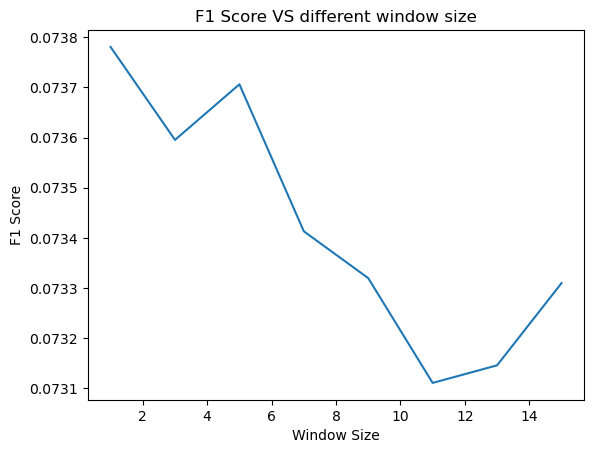

In [71]:
f1_scores = [i for i in performance.values()]
plt.plot([1,3,5,7,9,11, 13, 15], f1_scores)
plt.ylabel('F1 Score')
plt.xlabel('Window Size')
plt.title('F1 Score VS different window size')
plt.savefig('results/LG_Window.png')
plt.show()

* [Table of Contents](#Contents)

# Test for each cluster

In [91]:
test_with_cluster = pd.read_csv('data/test_with_cluster.csv')
test_with_cluster

,site,time,riskLevelLabel,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,...,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3,cluster
0,ukc1202-06650,2020-06-05,1,0.002986,0.039705,1.283574,0.149732,4.921273,2.247580,0.002986,...,0.142911,5.236460,2.083618,0.002986,0.039705,1.283574,0.142911,5.236460,2.083618,2
1,ukc1202-06700,2020-08-24,1,0.002458,0.093960,2.077496,0.183432,4.100962,3.201868,0.002458,...,0.183432,4.068698,3.201868,0.002458,0.093960,2.077496,0.183432,4.100962,3.201868,2
2,ukc2103-04600,2020-08-24,1,0.004586,0.026278,3.875391,0.174393,4.114664,2.894618,0.004586,...,0.128400,6.233653,1.770035,0.004586,0.026278,1.813883,0.128400,6.233653,1.770035,2
3,ukc2103-04600,2022-09-29,1,0.020971,0.146831,6.199709,0.188662,3.752482,3.292190,0.020971,...,0.190572,3.707183,3.348240,0.020266,0.123182,5.114015,0.191137,3.709506,3.366300,2
4,ukc2103-04700,2020-08-24,1,0.004586,0.026278,1.880023,0.131147,6.193217,1.846722,0.004586,...,0.131147,6.144756,1.846722,0.004586,0.026278,1.880023,0.131147,6.193217,1.846722,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ukk4304-34700,2022-09-26,1,0.042722,0.116843,8.494947,0.205334,3.423756,3.785667,0.042722,...,0.205334,3.423756,3.785667,0.042722,0.116843,8.494947,0.205334,3.423756,3.785667,2
96,ukk4304-34800,2020-08-18,1,0.044307,0.185059,7.211779,0.190118,3.757423,3.347346,0.044307,...,0.185305,3.757423,3.197144,0.044307,0.185059,10.558348,0.190118,3.831927,3.347346,2
97,ukk4305-26200,2021-06-23,1,0.003192,0.072590,0.261229,0.125868,6.125638,1.685297,0.003192,...,0.124253,6.125638,1.637736,0.003192,0.072590,0.468821,0.125868,6.125638,1.685297,2
98,ukk4306-22800,2020-06-11,1,0.015995,0.057877,5.296386,0.120047,6.405754,1.545960,0.015995,...,0.120047,6.405754,1.545960,0.015995,0.057877,5.296386,0.120047,6.405754,1.545960,2


In [94]:
X_test_1 = test_with_cluster[test_with_cluster['cluster']==1].iloc[:, 3:-1]
X_test_1 = scaler.transform(X_test_1)
y_pred_1 = best_lg.predict(X_test_1)

In [95]:
X_test_2 = test_with_cluster[test_with_cluster['cluster']==2].iloc[:, 3:-1]
X_test_2 = scaler.transform(X_test_2)
y_pred_2 = best_lg.predict(X_test_2)

In [93]:
T_1 = np.sum(y_pred_1 == 1)
ACC_1 = T_1/len(y_pred_1)
ACC_1

0.023255813953488372

In [96]:
T_2 = np.sum(y_pred_2 == 2)
ACC_2 = T_2/len(y_pred_2)
ACC_2

0.0

* [Table of Contents](#Contents)